In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',None)

In [172]:
df = pd.read_csv('winequality-red.csv')

In [173]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


First and foremost will check is there any Nan values present in the Dataset.

In [174]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no Nan values present in Dataset.

In [175]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

As there are many labels, we will divide it into 3 labels. 

In [176]:
df['quality'] = np.where(df['quality']<=4,0,df['quality'])

In [177]:
df['quality'] = np.where((df['quality']<=6) & (df['quality']!=0 ),1,df['quality'])

In [178]:
df['quality'] = np.where( df['quality']>=7,2,df['quality'])

we have converted quality variable into three labels as 0-poor,1-good,2-best.

In [179]:
df.quality.value_counts()

1    1319
2     217
0      63
Name: quality, dtype: int64

As we can see here,Dataset is completely imbalanced.

so,we need to fix it. Otherwise your model will baised to single label.

In [180]:
from imblearn.combine import SMOTETomek

In [181]:
smk = SMOTETomek(random_state=0)

In [182]:
X,y=smk.fit_sample(df.drop('quality',axis=1),df['quality'])

In [183]:
df = pd.concat([X,y],axis=1)

In [184]:
df.quality.value_counts()

2    1301
0    1300
1    1284
Name: quality, dtype: int64

Now, it is perfectly balanced dataset

In [208]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


Here,All the variables(features) are of Numerical type.

will analyse it one by one. 

In [209]:
features = [feature for feature in df.columns if feature!='quality']

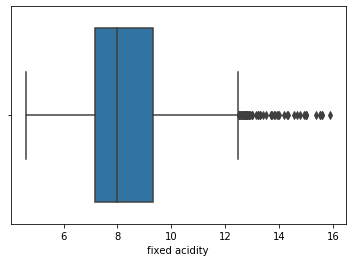

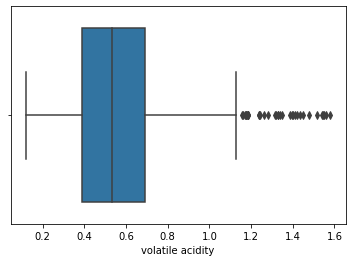

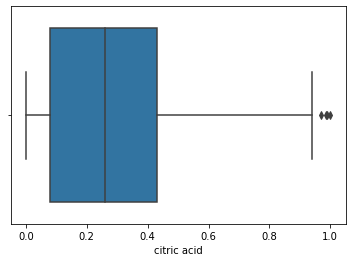

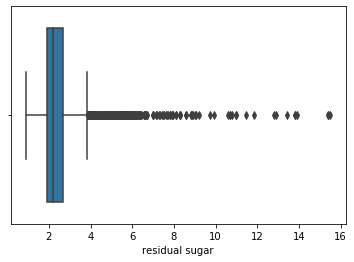

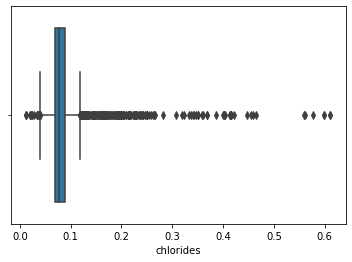

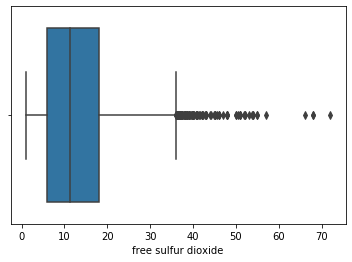

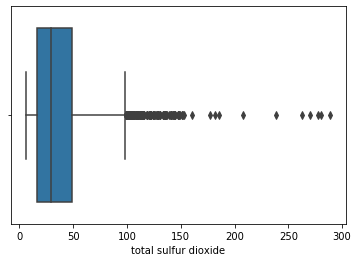

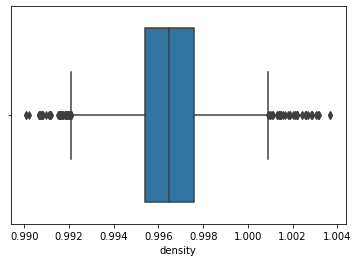

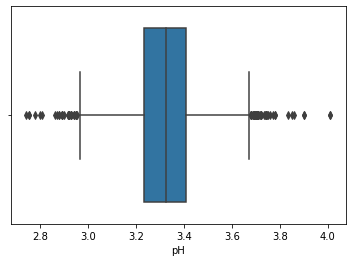

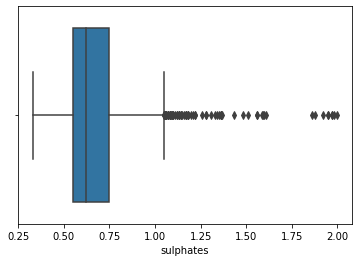

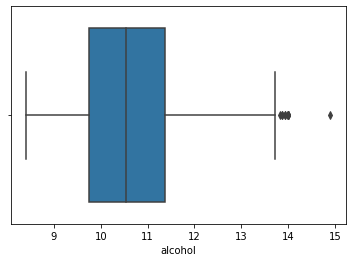

In [210]:
for feature in features:
    sns.boxplot(x=feature,data=df)
    plt.xlabel(feature)
    plt.show()

As we can see there are number of Outliers present in each feature.
so,here will use top encoding and bottom encoding technique to fix this.

In [211]:
dic = {}
for feature in features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

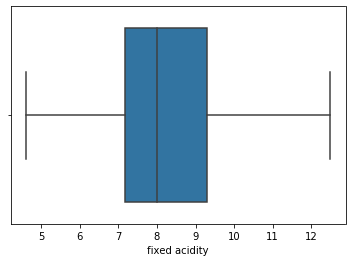

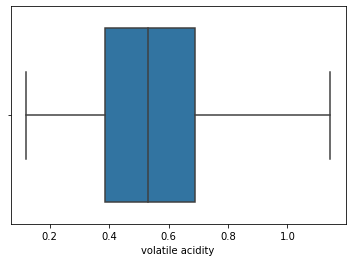

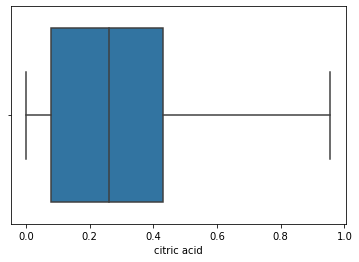

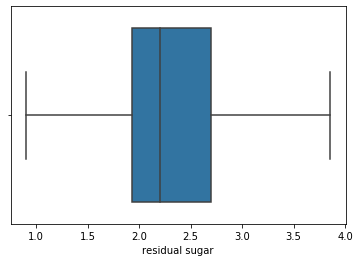

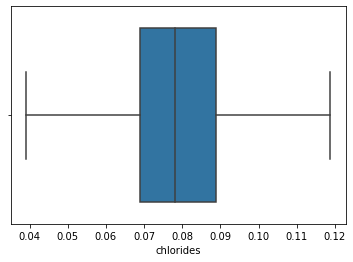

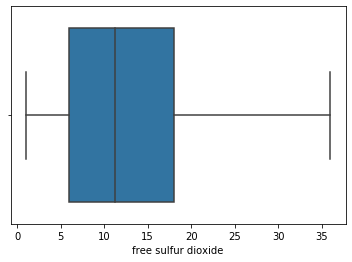

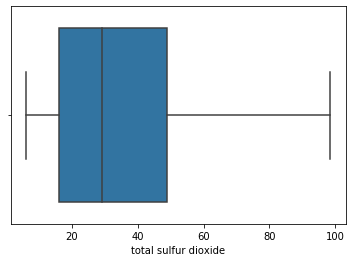

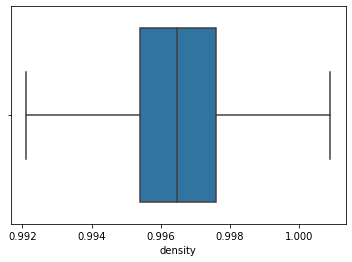

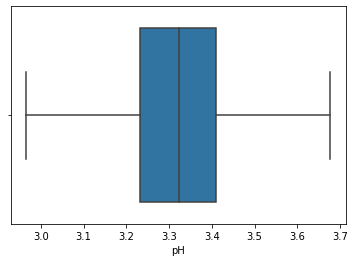

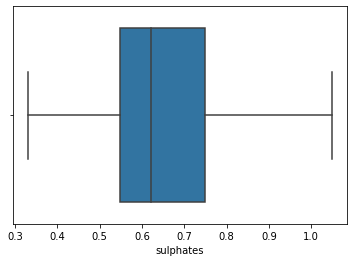

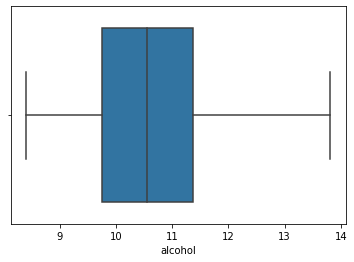

In [212]:
for feature in features:
    sns.boxplot(x=feature,data=df)
    plt.xlabel(feature)
    plt.show()

Now we will move to feature selection part.

In [213]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [214]:
selectk = SelectKBest(score_func=chi2,k=7)

In [215]:
Best = selectk.fit(df.drop('quality',axis=1),df['quality'])

In [216]:
Best.scores_

array([6.87019361e+01, 1.35036641e+02, 1.26317514e+02, 7.53876154e+00,
       8.19994104e-01, 8.69992300e+02, 4.23738956e+03, 5.96964989e-04,
       1.96784909e+00, 3.02098011e+01, 1.52110458e+02])

These are the scores related to each feature with respect to output variable(quality).

In [217]:
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [218]:
dfscores = pd.DataFrame(Best.scores_)
dffeatures = pd.DataFrame(features)

we are mapping each score with respect to each feature recpectively.

In [219]:
features_scores = pd.concat([dffeatures,dfscores],axis=1)

In [220]:
features_scores.columns = ['feature','scores']

In [221]:
features_scores.sort_values(by='scores',ascending=False)

,feature,scores
6,total sulfur dioxide,4237.389565
5,free sulfur dioxide,869.992300
10,alcohol,152.110458
1,volatile acidity,135.036641
2,citric acid,126.317514
0,fixed acidity,68.701936
9,sulphates,30.209801
3,residual sugar,7.538762
8,pH,1.967849
4,chlorides,0.819994


we will take top 7 features

In [222]:
Best_features = features_scores[features_scores['scores']>30]['feature']

Feature Selection with the help of correlation

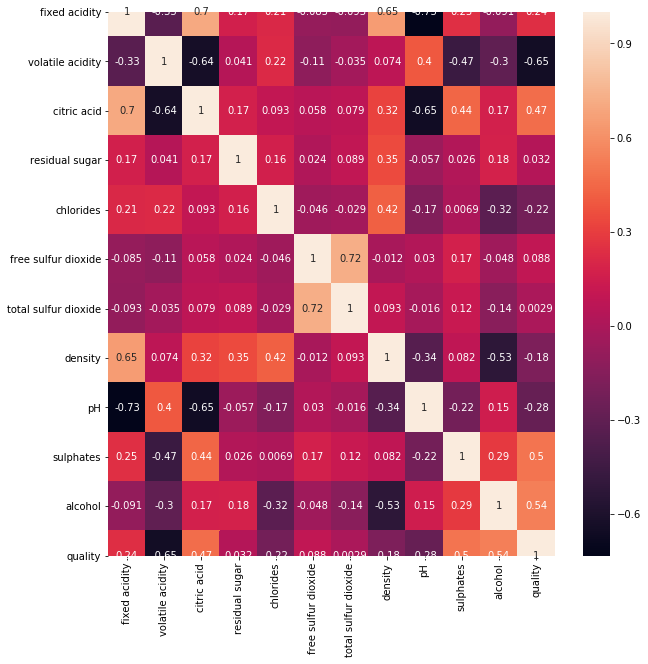

In [223]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

From above we can notice that volatile acidity,citric acid,alcohol and sulphates are correlated more than fifty percent to target variable (quality).

Now we split our dataset into train and test dataset.

In [225]:
from sklearn.model_selection import train_test_split

In [341]:
X_train,X_test,y_train,y_test = train_test_split(df[Best_features],df['quality'],test_size=0.2,random_state=0)

In [260]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report

But Outliers do not impact much on tree based models.

In [262]:
from sklearn.tree import DecisionTreeClassifier

In [263]:
model = DecisionTreeClassifier()

In [264]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [271]:
y_predict = model.predict(X_test)

In [272]:
y_predict_proba_train = model.predict_proba(X_train)

In [273]:
y_predict_proba_test = model.predict_proba(X_test)

In [274]:
roc_auc_score(y_train,y_predict_proba_train,multi_class='ovo')

1.0

In [275]:
roc_auc_score(y_test,y_predict_proba_test,multi_class='ovo')

0.9072050711101584

As we know Decision tree follows low bias and high variance. Which means for training dataset it gives high accuracy but for testing dataset it gives less accuracy.

This problem can be easily solved with the help of ensemble techniques. 

e.g - RandomForest,XGBoost.

In [276]:
confusion_matrix(y_test,y_predict)

array([[211,  13,   3],
       [ 21, 216,  28],
       [  3,  30, 252]], dtype=int64)

In [277]:
accuracy_score(y_test,y_predict)

0.8738738738738738

In [278]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       227
           1       0.83      0.82      0.82       265
           2       0.89      0.88      0.89       285

    accuracy                           0.87       777
   macro avg       0.87      0.88      0.88       777
weighted avg       0.87      0.87      0.87       777



From above we can see that for class 1 precision and recall is falling behind

In [279]:
from sklearn.model_selection import cross_val_score

In [344]:
cross_val_score(model,df[Best_features],df['quality'],scoring='accuracy',n_jobs=-1).mean()

0.9065637065637064

with cross_val_score, Decisison Tree is giving 82% accuracy. 

In [281]:
from sklearn.ensemble import RandomForestClassifier

In [308]:
model = RandomForestClassifier()

In [309]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [310]:
y_predict = model.predict(X_test)

In [311]:
y_predict_proba_train = model.predict_proba(X_train)

In [312]:
y_predict_proba_test = model.predict_proba(X_test)

In [313]:
roc_auc_score(y_train,y_predict_proba_train,multi_class='ovo')

1.0

In [314]:
roc_auc_score(y_test,y_predict_proba_test,multi_class='ovo')

0.9879143256139962

As we can see RandomForest fixed the problem of low bias high variance to low bias low variance.

In [316]:
confusion_matrix(y_test,y_predict)

array([[219,   8,   0],
       [ 16, 224,  25],
       [  0,  16, 269]], dtype=int64)

In [317]:
accuracy_score(y_test,y_predict)

0.9163449163449163

In [318]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       227
           1       0.90      0.85      0.87       265
           2       0.91      0.94      0.93       285

    accuracy                           0.92       777
   macro avg       0.92      0.92      0.92       777
weighted avg       0.92      0.92      0.92       777



Precision and Recall is improved with Random Forest

In [292]:
cross_val_score(model,df[Best_features],df['quality'],scoring='accuracy',n_jobs=-1).mean()

0.8872586872586872

we can see Random  Forest Classifier is giving 88% with cross_val_score

Now we will check with XGBClassifier.

In [321]:
from xgboost import XGBClassifier

In [322]:
model = XGBClassifier()

In [323]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [324]:
y_predict = model.predict(X_test)

In [325]:
y_predict_proba_train = model.predict_proba(X_train)

In [326]:
y_predict_proba_test = model.predict_proba(X_test)

In [327]:
roc_auc_score(y_train,y_predict_proba_train,multi_class='ovo')

1.0

In [328]:
roc_auc_score(y_test,y_predict_proba_test,multi_class='ovo')

0.9907936855132039

In [329]:
confusion_matrix(y_test,y_predict)

array([[219,   8,   0],
       [ 10, 231,  24],
       [  0,   9, 276]], dtype=int64)

In [330]:
accuracy_score(y_test,y_predict)

0.9343629343629344

In [331]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       227
           1       0.93      0.87      0.90       265
           2       0.92      0.97      0.94       285

    accuracy                           0.93       777
   macro avg       0.94      0.93      0.93       777
weighted avg       0.93      0.93      0.93       777



Precision and Recall is further improved with XGBoost

In [332]:
cross_val_score(model,df[Best_features],df['quality'],scoring='accuracy',n_jobs=-1).mean()

0.9065637065637064

XGBClassifier is giving 90% accuracy with cross_val_score

we will improve model accuracy by using Hyperparameter Optimization.

Here we are using RandomizedSearchCV.

In [305]:
params = {
    'n_estimators' : list(np.arange(5,101,1)) ,
    'max_depth' : list(np.arange(3,16,1)) ,
    'min_child_weight' : [1,3,4,5,6,7,8] ,
    'learning_rate' : list(np.arange(0.05,0.35,0.05)) ,
    'colsample_bytree' : [0.4,0.5,0.6,0.7],
    'gamma' : [0.0,0.1,0.2,0.3,0.4]    
}

In [158]:
from sklearn.model_selection import RandomizedSearchCV

In [143]:
random_search = RandomizedSearchCV(model,param_distributions=params,n_jobs=-1,scoring='accuracy',verbose=3,cv=5)

In [144]:
random_search.fit(df[Best_features],df['quality'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'learning_rate': [0.05, 0.1,
                                                          0.15000000000000002,
                                

In [145]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [306]:
model = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=14,
              min_child_weight=1,  monotone_constraints=None,
              n_estimators=80, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [307]:
cross_val_score(model,df[Best_features],df['quality'],scoring='accuracy',n_jobs=-1).mean()

0.9117117117117118

As we can see with the help of Hyperparameter Optimization we have improved 1% accuracy

#### I hope you enjoyed a lot.

#### Thank You